<a href="https://colab.research.google.com/github/divyanshi005/Customer-Segmentation/blob/main/Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from google.colab import files
uploaded=files.upload()

Saving Mall_Customers.csv to Mall_Customers.csv


In [3]:
df=pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.shape

(200, 5)

In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
df.dtypes

,0
CustomerID,int64
Gender,object
Age,int64
Annual Income (k$),int64
Spending Score (1-100),int64


In [7]:
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [8]:
df.drop(["CustomerID"],axis=1,inplace=True)

In [9]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [10]:
#analysis:
#create distribution plot:

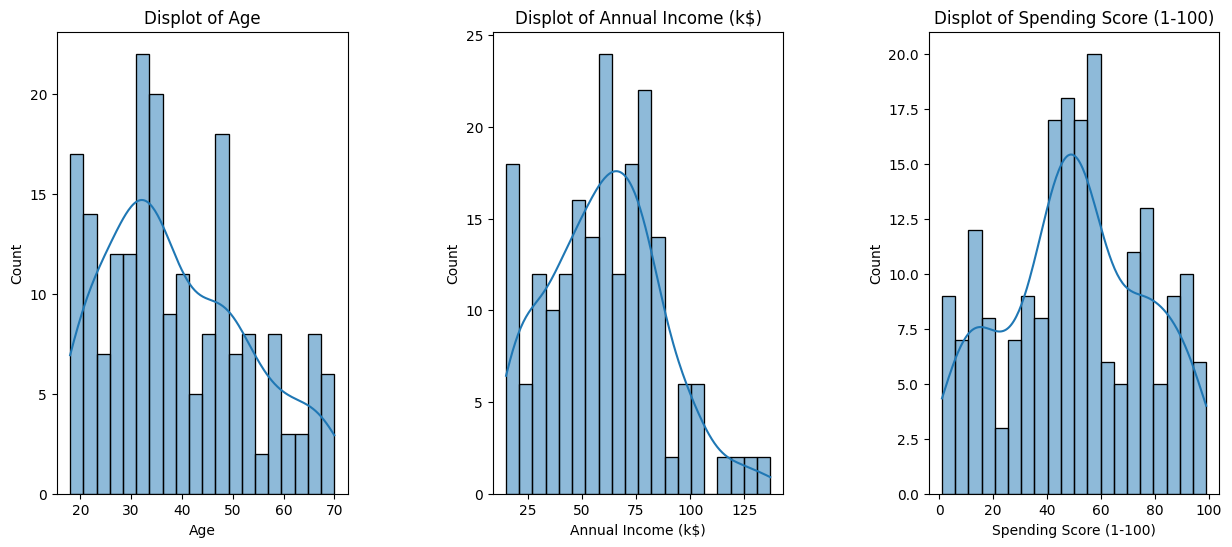

In [11]:
plt.figure(1,figsize=(15,6))
n=0;
for x in ['Age','Annual Income (k$)','Spending Score (1-100)']:
  n+=1
  ax= plt.subplot(1,3,n)
  plt.subplots_adjust(hspace=0.5,wspace=0.5)
  sns.histplot(df[x],bins=20, ax=ax,kde=True)
  plt.title('Displot of {}'.format(x))
plt.show()

* plt.figure(1, figsize=(15, 6)): Creates a figure object with ID 1 and size 15x6.

* n = 0: Initializes a counter for subplots.

* for x in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']: Iterates through the columns to plot.

* n += 1: Increments the subplot counter.

* plt.subplot(1, 3, n): Creates a subplot in a 1x3 grid at the current count.

* plt.subplots_adjust(hspace=0.5, wspace=0.5): Adds spacing between subplots.

* sns.displot(df[x], bins-20): Creates the distribution plot using Seaborn's displot function. Note: bins-20 should be bins=20

* plt.title('Displot of {}'.format(x)): Sets the title of the subplot.

* plt.show(): Displays the plots.

* In a histogram, bins define the intervals into which your data is divided and counted. Each bin is represented by a bar, and the height of the bar corresponds to the number of data points falling within that bin's interval.

<function matplotlib.pyplot.show(close=None, block=None)>

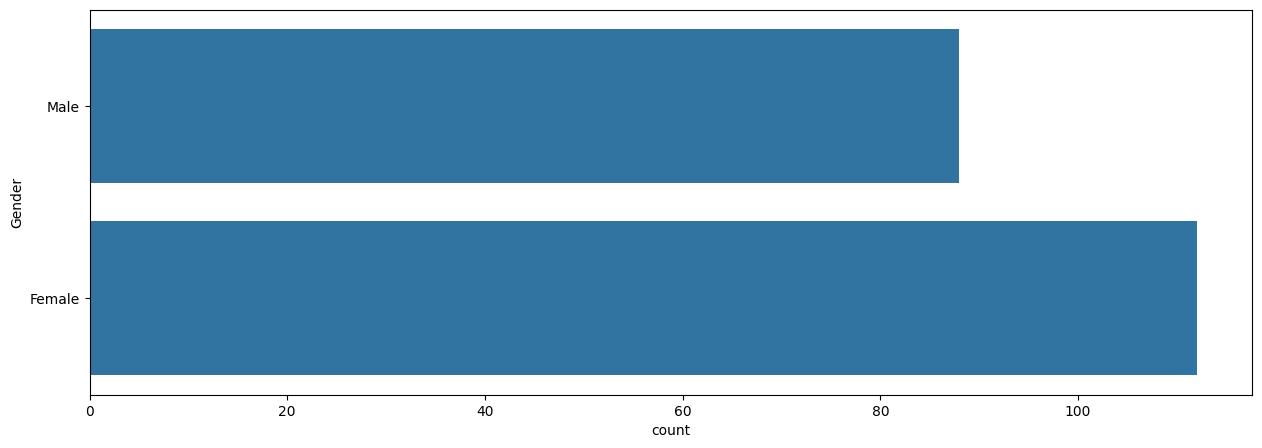

In [12]:
plt.figure(figsize=(15,5))
sns.countplot(y='Gender',data=df)
plt.show

* This code creates a countplot of the 'Gender' column in the DataFrame df.

*  plt.figure(figsize=(15, 5)): Creates a figure object with a size of 15 by 5.
sns.countplot(y='Gender', data=df): Creates a countplot of the 'Gender' column with the DataFrame df as the data source. The y argument specifies that the gender categories should be displayed on the y-axis.
plt.show(): Displays the plot.
This code visualizes the count of each gender in the dataset using a countplot.

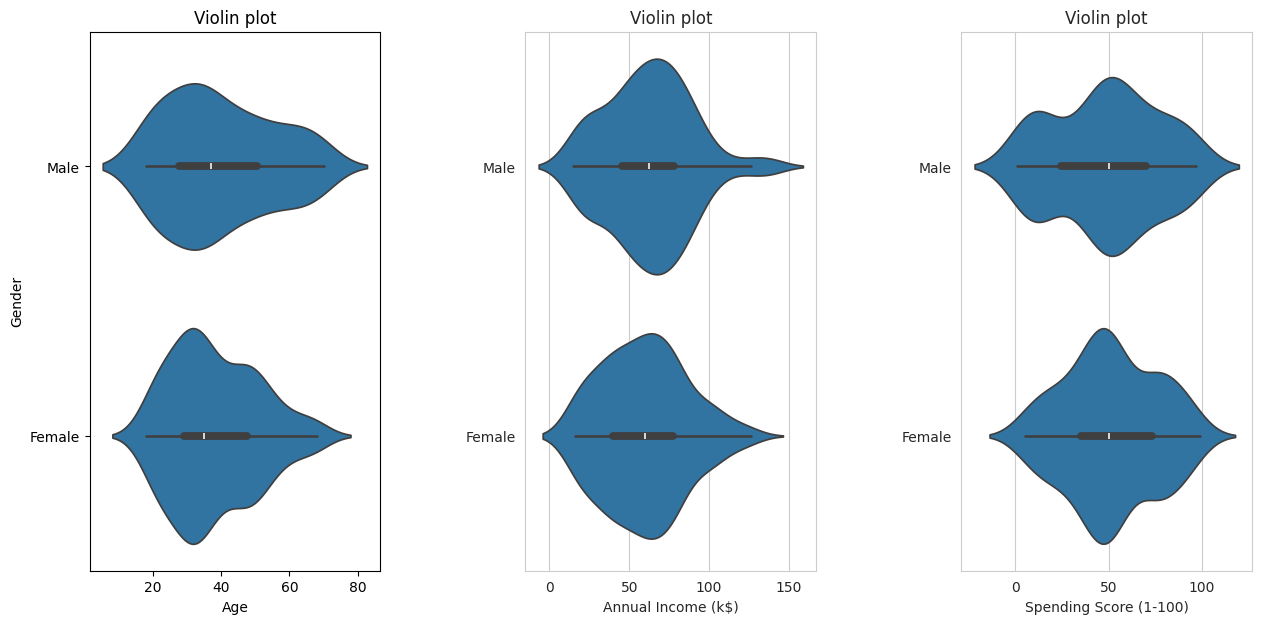

In [13]:
plt.figure(1,figsize=(15,7))
n=0;
for cols in ['Age','Annual Income (k$)','Spending Score (1-100)']:
  n+=1
  ax= plt.subplot(1,3,n)
  sns.set_style('whitegrid')
  plt.subplots_adjust(hspace=0.5,wspace=0.5)
  sns.violinplot(x=cols, y='Gender',data=df, ax=ax)
  plt.ylabel('Gender' if n==1 else '')
  plt.title('Violin plot')
plt.show()

In [14]:
#divinding age into categorries(ranges) to know which range has highest no. of customers:



<ipython-input-17-4d3daa530833>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=agex,y=agey,palette='rocket')


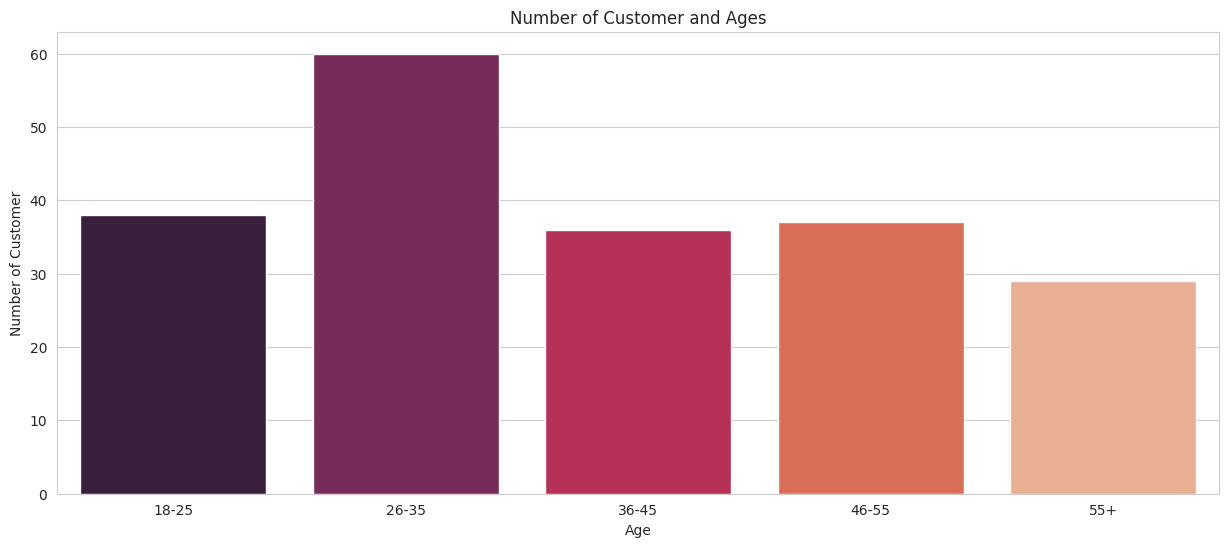

In [17]:
age_18_25=df.Age[(df.Age>=18) &(df.Age<=25)]
age_26_35=df.Age[(df.Age>=26) &(df.Age<=35)]
age_36_45=df.Age[(df.Age>=36) &(df.Age<=45)]
age_46_55=df.Age[(df.Age>=46) &(df.Age<=55)]
age_55above=df.Age[df.Age>=56]

agex=["18-25","26-35","36-45","46-55","55+"]
agey=[len(age_18_25.values),len(age_26_35.values),len(age_36_45.values),len(age_46_55.values),len(age_55above.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=agex,y=agey,palette='rocket')
plt.title('Number of Customer and Ages')
plt.xlabel('Age')
plt.ylabel('Number of Customer')
plt.show()


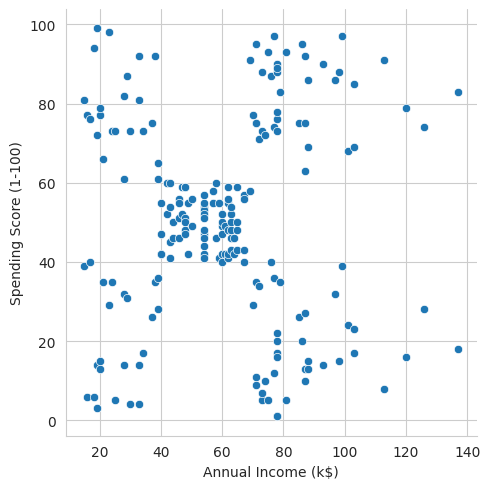

In [19]:
sns.relplot(x='Annual Income (k$)',y='Spending Score (1-100)',data=df)

<ipython-input-21-0abddc21bf21>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ssx,y=ssy,palette='rocket')


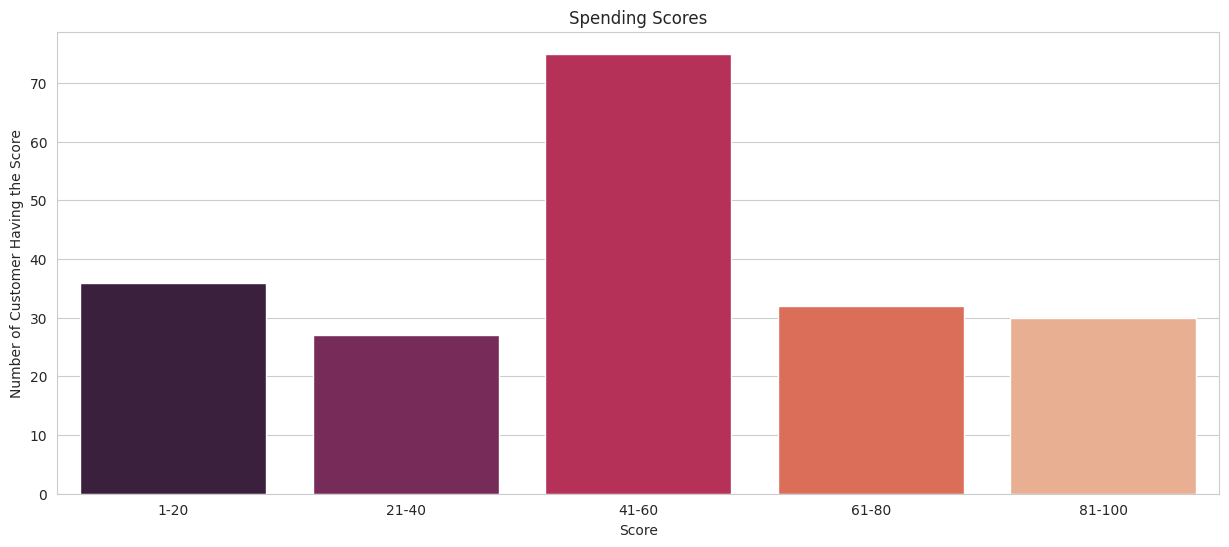

In [21]:
ss_1_20=df['Spending Score (1-100)'][(df['Spending Score (1-100)']>=1) &(df['Spending Score (1-100)']<=20)]
ss_21_40=df['Spending Score (1-100)'][(df['Spending Score (1-100)']>=21) &(df['Spending Score (1-100)']<=40)]
ss_41_60=df['Spending Score (1-100)'][(df['Spending Score (1-100)']>=41) &(df['Spending Score (1-100)']<=60)]
ss_61_80=df['Spending Score (1-100)'][(df['Spending Score (1-100)']>=61) &(df['Spending Score (1-100)']<=80)]
ss_81_100=df['Spending Score (1-100)'][(df['Spending Score (1-100)']>=81) &(df['Spending Score (1-100)']<=100)]


ssx=["1-20","21-40","41-60","61-80","81-100"]
ssy=[len(ss_1_20.values),len(ss_21_40.values),len(ss_41_60.values),len(ss_61_80.values),len(ss_81_100.values)]


plt.figure(figsize=(15,6))
sns.barplot(x=ssx,y=ssy,palette='rocket')
plt.title('Spending Scores')
plt.xlabel('Score')
plt.ylabel('Number of Customer Having the Score')
plt.show()


<ipython-input-23-95ffa1c0118b>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=aix,y=aiy,palette='Spectral')


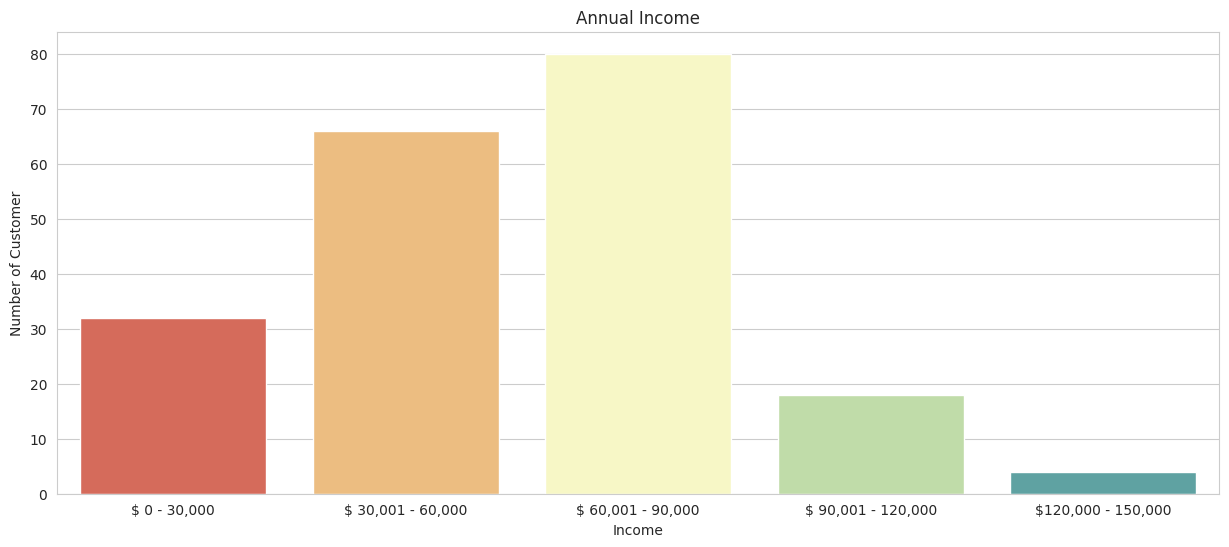

In [23]:
ai_0_30=df['Annual Income (k$)'][(df['Annual Income (k$)']>=0) &(df['Annual Income (k$)']<=30)]
ai_31_60=df['Annual Income (k$)'][(df['Annual Income (k$)']>=31) &(df['Annual Income (k$)']<=60)]
ai_61_90=df['Annual Income (k$)'][(df['Annual Income (k$)']>=61) &(df['Annual Income (k$)']<=90)]
ai_91_120=df['Annual Income (k$)'][(df['Annual Income (k$)']>=91) &(df['Annual Income (k$)']<=120)]
ai_121_150=df['Annual Income (k$)'][(df['Annual Income (k$)']>=121) &(df['Annual Income (k$)']<=150)]

aix=["$ 0 - 30,000", "$ 30,001 - 60,000", "$ 60,001 - 90,000", "$ 90,001 - 120,000", "$120,000 - 150,000"]
aiy=[len(ai_0_30.values),len(ai_31_60.values),len(ai_61_90.values),len(ai_91_120.values),len(ai_121_150.values)]


plt.figure(figsize=(15,6))
sns.barplot(x=aix,y=aiy,palette='Spectral')
plt.title('Annual Income')
plt.xlabel('Income')
plt.ylabel('Number of Customer')
plt.show()

In [24]:
#clustering :

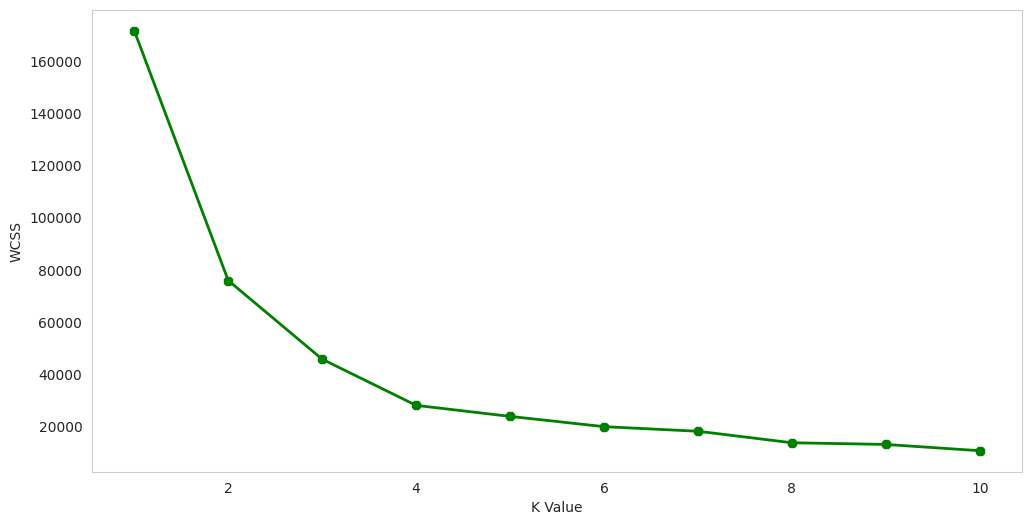

In [32]:
#relationship bw age and spending score:
x1=df.loc[:,["Age","Spending Score (1-100)"]].values

from sklearn.cluster import KMeans
wcss=[]

for k in range(1,11):
  kmean=KMeans(n_clusters=k,init='k-means++',random_state=42)
  kmean.fit(x1)
  wcss.append(kmean.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),wcss,linewidth=2,color='green',marker='8')
plt.xlabel('K Value')
plt.ylabel('WCSS')
plt.show()

The code you provided is a crucial step in K-means clustering, a popular unsupervised machine learning algorithm. It's used to find groups (clusters) in data where you don't have pre-defined labels.

Here's a breakdown of what the code does:

Data Selection: x1 = df.loc[:, ["Age", "Spending Score (1-100)"]].values

This line selects the "Age" and "Spending Score" columns from your DataFrame (df). These are the features you'll use for clustering.
.values extracts the data as a NumPy array, which is the format required by scikit-learn (the machine learning library you're using).
K-Means Setup: from sklearn.cluster import KMeans and wcss = []

from sklearn.cluster import KMeans imports the K-Means algorithm from scikit-learn.
wcss = [] creates an empty list called wcss. This list will store the "Within-Cluster Sum of Squares" (WCSS) for different numbers of clusters. WCSS is a measure of how compact the clusters are.
Finding the Optimal Number of Clusters (Elbow Method):

for k in range(1, 11): This loop iterates through values of k from 1 to 10. k represents the number of clusters.
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42):
Creates a K-Means object with k clusters.
init='k-means++' is a smarter way to initialize the cluster centers than just random selection. It helps the algorithm converge faster and potentially find a better solution.
random_state=42 ensures you get the same results each time you run the code (for reproducibility).

kmeans.fit(x1): Fits the K-Means model to your data (x1). The algorithm tries to find the best cluster centers and assign data points to those clusters.
wcss.append(kmeans.inertia_): Calculates the WCSS for the current number of clusters and adds it to the wcss list.
The goal of this process is to find the "elbow point" in a plot of WCSS vs. the number of clusters. The elbow point suggests a good number of clusters for your data.

You would typically plot the wcss values against the range of k values. The point where the decrease in WCSS starts to level off (like an elbow) is often a good indication of the optimal number of clusters.

This code snippet sets the stage for finding the optimal k and then performing the actual clustering with that value.

In [39]:
kmeans=KMeans(n_clusters=4)
label=kmeans.fit_predict(x1)
print(label)

[3 1 2 1 3 1 2 1 2 1 2 1 2 1 2 1 3 3 2 1 3 1 2 1 2 1 2 3 2 1 2 1 2 1 2 1 2
 1 2 1 0 1 0 3 2 3 0 3 3 3 0 3 3 0 0 0 0 0 3 0 0 3 0 0 0 3 0 0 3 3 0 0 0 0
 0 3 0 3 3 0 0 3 0 0 3 0 0 3 3 0 0 3 0 3 3 3 0 3 0 3 3 0 0 3 0 3 0 0 0 0 0
 3 3 3 3 3 0 0 0 0 3 3 3 1 3 1 0 1 2 1 2 1 3 1 2 1 2 1 2 1 2 1 3 1 2 1 0 1
 2 1 2 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1 2 1 2 3 2 1 2 1 2 1 2 1 2 1 2 1 2 1 0
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


In [35]:
print(kmeans.cluster_centers_)

[[30.1754386  82.35087719]
 [55.40816327 48.04081633]
 [43.29166667 15.02083333]
 [27.32608696 49.36956522]]


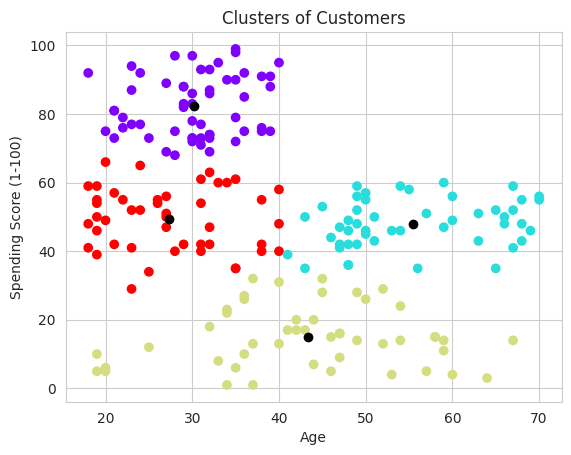

In [38]:
plt.scatter(x1[:,0],x1[:,1],c=kmeans.labels_,cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='black')
plt.title('Clusters of Customers')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.show()

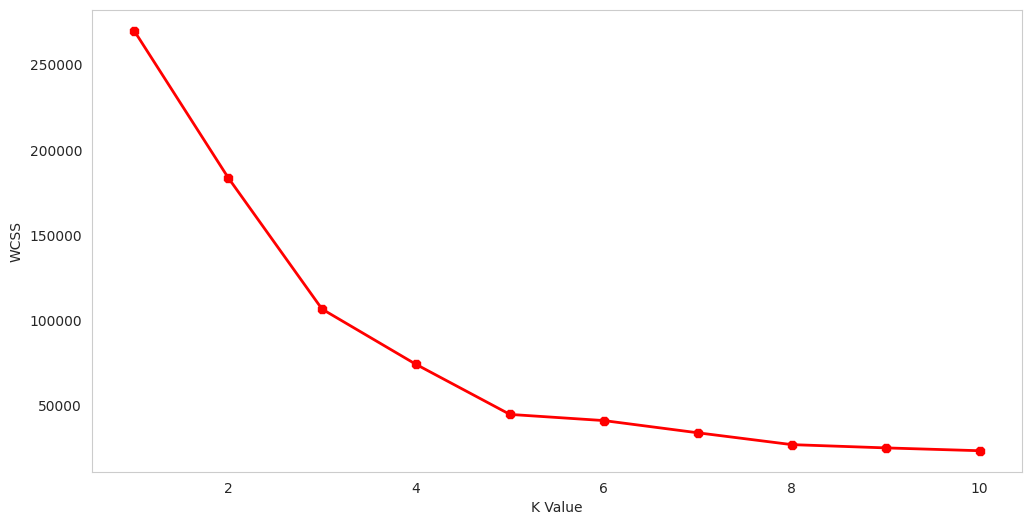

In [41]:
x2=df.loc[:,["Annual Income (k$)","Spending Score (1-100)"]].values

from sklearn.cluster import KMeans
wcss=[]

for k in range(1,11):
  kmean=KMeans(n_clusters=k,init='k-means++',random_state=42)
  kmean.fit(x2)
  wcss.append(kmean.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),wcss,linewidth=2,color='red',marker='8')
plt.xlabel('K Value')
plt.ylabel('WCSS')
plt.show()

In [44]:
kmeans=KMeans(n_clusters=5)
label=kmeans.fit_predict(x2)
print(label)

[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4
 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 3 4 3 4 3
 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4]


fit_predict: This method combines the fitting and prediction steps. It first fits the KMeans model to your data (x2) to find the cluster centers.
Then, it predicts the cluster assignment for each data point in x2 and returns those assignments as label.

In [45]:
print(kmeans.cluster_centers_)

[[ 48.16831683  43.3960396 ]
 [ 78.89285714  17.42857143]
 [ 25.72727273  79.36363636]
 [109.7         22.        ]
 [ 86.53846154  82.12820513]]


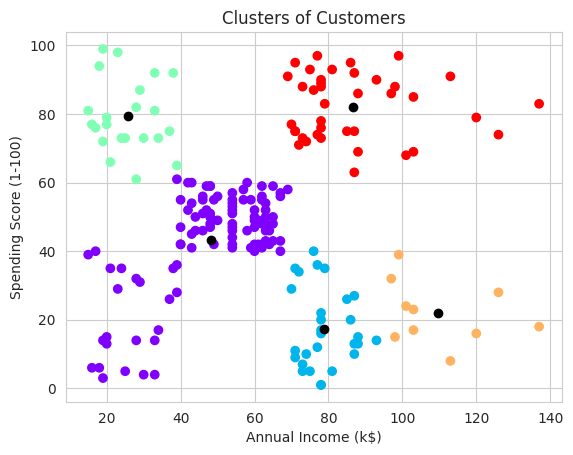

In [54]:
plt.scatter(x2[:,0],x2[:,1],c=kmeans.labels_,cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='black')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show();

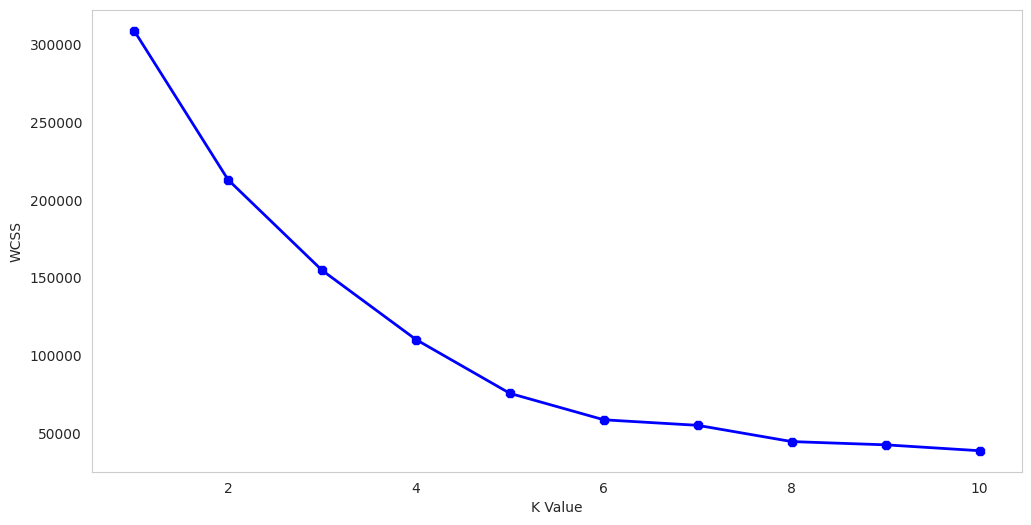

In [59]:
x3=df.iloc[:,1:]
wcss=[]
for k in range(1,11):
    kmean=KMeans(n_clusters=k,init='k-means++')
    kmean.fit(x3)
    wcss.append(kmean.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),wcss,linewidth=2,color='blue',marker='8')
plt.xlabel('K Value')
plt.ylabel('WCSS')
plt.show()

In [60]:
kmeans=KMeans(n_clusters=5)
label=kmeans.fit_predict(x3)
print(label)

[4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4
 0 4 0 4 0 4 0 4 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 3 1 3 2 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 2 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3]


In [61]:
print(kmeans.cluster_centers_)

[[25.52173913 26.30434783 78.56521739]
 [40.66666667 87.75       17.58333333]
 [43.08860759 55.29113924 49.56962025]
 [32.69230769 86.53846154 82.12820513]
 [45.2173913  26.30434783 20.91304348]]


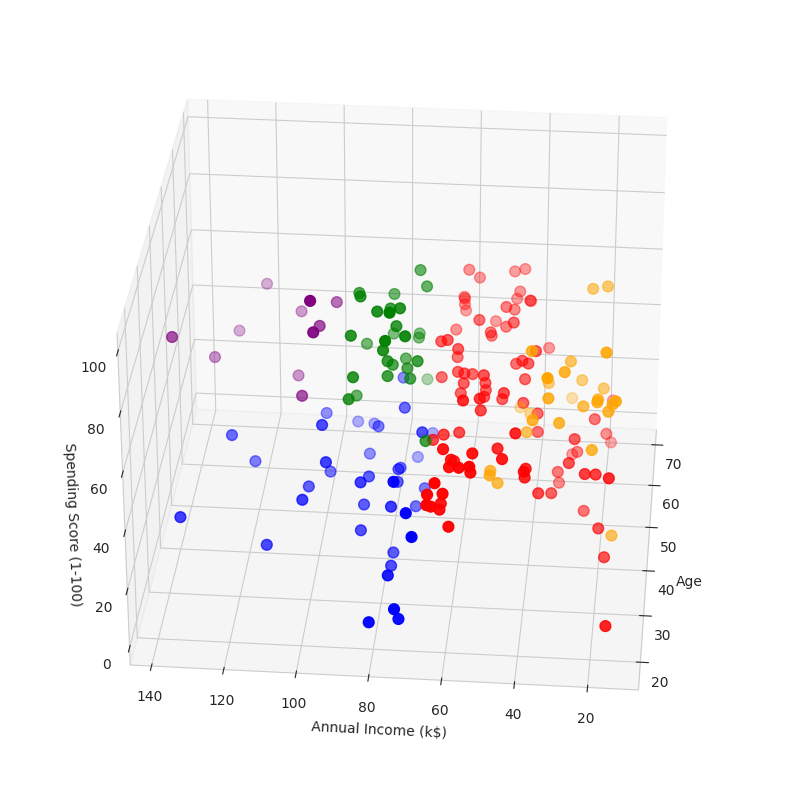

In [66]:
clusters=kmeans.fit_predict(x3)
df['label']=clusters
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure(figsize=(20,10))
ax=fig.add_subplot(111,projection='3d')
ax.scatter(df.Age[df.label==0],df['Annual Income (k$)'][df.label==0],df['Spending Score (1-100)'][df.label==0],c='blue',s=60)
ax.scatter(df.Age[df.label==1],df['Annual Income (k$)'][df.label==1],df['Spending Score (1-100)'][df.label==1],c='red',s=60)
ax.scatter(df.Age[df.label==2],df['Annual Income (k$)'][df.label==2],df['Spending Score (1-100)'][df.label==2],c='green',s=60)
ax.scatter(df.Age[df.label==3],df['Annual Income (k$)'][df.label==3],df['Spending Score (1-100)'][df.label==3],c='orange',s=60)
ax.scatter(df.Age[df.label==4],df['Annual Income (k$)'][df.label==4],df['Spending Score (1-100)'][df.label==4],c='purple',s=60)
ax.view_init(30,185)
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
plt.show()